In [97]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.feature_selection import RFE

In [98]:
df= pd.read_csv("diabetes.csv")
print(df.shape)
df.head(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [100]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [101]:
X= df.drop('Outcome', axis=1)
y= df['Outcome'].values

### divide data into train and test

X_app, X_test, y_app, y_test= model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
print(X_app.shape,y_app.shape)
print(X_test.shape,y_test.shape)


(614, 8) (614,)
(154, 8) (154,)


In [102]:
model=LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [103]:
y_pred= model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

### accuracy
accuracy=accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)

### error
print("error :",1-accuracy)

### recall
recall =recall_score(y_test,y_pred)
print("recall :",recall)


[[99  8]
 [18 29]]
accuracy : 0.8311688311688312
error : 0.16883116883116878
recall : 0.6170212765957447


In [104]:
### cross validation (k-fold)
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
model_all=lr.fit(X,y)
success=model_selection.cross_val_score(model_all, X, y, cv=10,scoring='accuracy')
print("success :",success)
print("sucess rate: ",success.mean())


success : [0.72727273 0.77922078 0.80519481 0.71428571 0.75324675 0.76623377
 0.80519481 0.80519481 0.75       0.82894737]
sucess rate:  0.7734791524265209


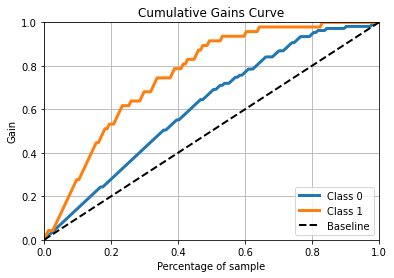

In [105]:
### cumulative gain curve

y_pred_proba = model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pred_proba)
plt.show()



In [106]:
### variable selection RFE

selector = RFE(estimator=model)
sol = selector.fit(X_app, y_app)
print(sol.n_features_)

4


In [110]:
### testing new variables selected

X_new_app= selector.transform(X_app)
print(X_new_app.shape)

model_sel=model.fit(X_new_app,y_app)

X_new_test= selector.transform(X_test)
print(X_new_test.shape)

y_pred_sel = model_sel.predict(X_new_test)

print("accuracy:",accuracy_score(y_test,y_pred_sel))

(614, 4)
(154, 4)
accuracy: 0.8116883116883117
